# Embedding using non-linear method such as tSNE

t-SNE is a randomized/stochastic/probabilistic algorithm it might show different results everytime it is run.
Parameters choice may influence the results (**compare the results with previous algorithms**).
Important: random_state=0 makes sure the results are not different everytime t-SNE is run.

Dataset we will be using
- MNIST dataset consist of 60k handwritten images of numbers from 0-9 and is commonly used for training various image processing systems.
- It can be downloaded from [here](https://www.kaggle.com/c/digit-recognizer/data)

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Loading MNIST dataset

In [3]:
data_set0 = pd.read_csv('MNIST_data.csv')
print(data_set0.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
#Saving labels to a variable called label.
label = data_set0['label']
#Dropping label column.
data_set1 = data_set0.drop("label", axis = 1) 
print(label.shape)
print(data_set1.shape)

(42000,)
(42000, 784)


### Check the dataset itself

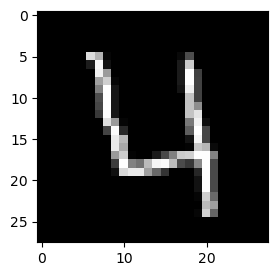

4


In [5]:
#Plotting a random number

plt.figure(figsize=(3,3))
idx = 3 #Enter any random index value from 0 to 41999.

grid_data = data_set1.iloc[idx].values.reshape(28,28)  #Use 'as_matrix()' if 'values' doesn't work.
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

### Data - preprocessing
Very important: standardizing the data.
StandardScaler is present in 'sklearn.preprocessing' module.

We also use it for PCA. 


In [6]:
labels = label.head(42000)
data = data_set1.head(42000)
print(data.shape)


standardized_data = StandardScaler().fit_transform(data.astype(float))
print(standardized_data.shape)

(42000, 784)
(42000, 784)


# Before applying t-SNE 

What are main dimensions of this dataset?
784 pixels with value in each of them. 
42000 samples in dataset. 

    Meaning of pixel value from 784 pixels - value from gray scale. 
    Meaning of each "hand-drawn" number-sample from 42000 - how computer "sees" numbers?
    
# Applying t-SNE

Configuring the parameteres:
1. the number of components = 2
2. default perplexity = 30
3. default learning rate = 200
4. default Maximum number of iterations for the optimization = 1000

## Perplexity parameter
The perplexity is related to the **number of nearest neighbors** that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results. 

        early_exaggerationfloat, default=12.0


Careful, may take a lot of energy to run!!! 
Takes around 5-10 minutes to run each depending on perplexity information

# Now let us run tSNE with standard parameters

In [ ]:
# TSNE

data = standardized_data[:,:]

# since t-SNE is a randomized/stochastic/probabilistic algorithm it might show different results everytime it is run.
# random_state=0 makes sure the results are not different everytime t-SNE is run.
model = TSNE(n_components=2, random_state=0) 
# Configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)


# Creating a new data frame which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Use size if height results in warning.
plt.show()

C:\Users\tupikina\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tupikina\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# Detecting effect of parameters

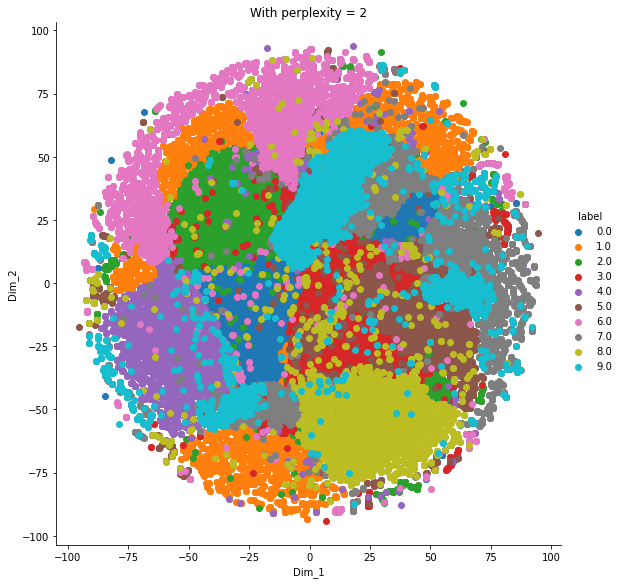

In [11]:
# With changed perplexity=2 - makes it flatter but longer to run

model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data) 

# creating a new dataframe which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

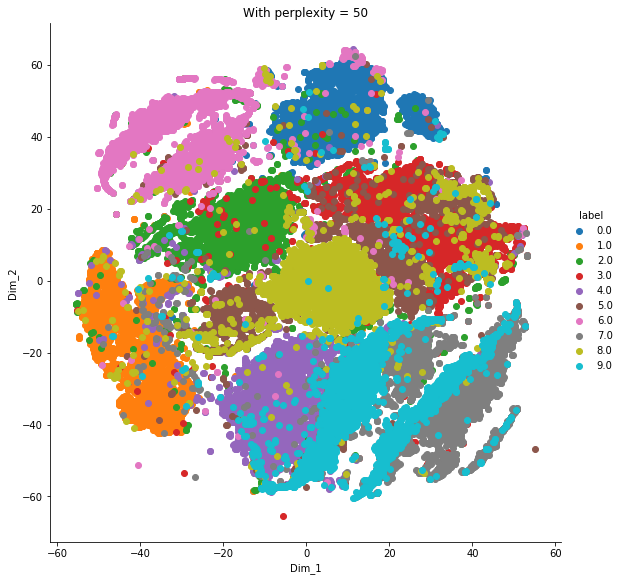

In [ ]:
# With changed perplexity=50

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Use size if height results in warning.
plt.title('With perplexity = 50')
plt.show()

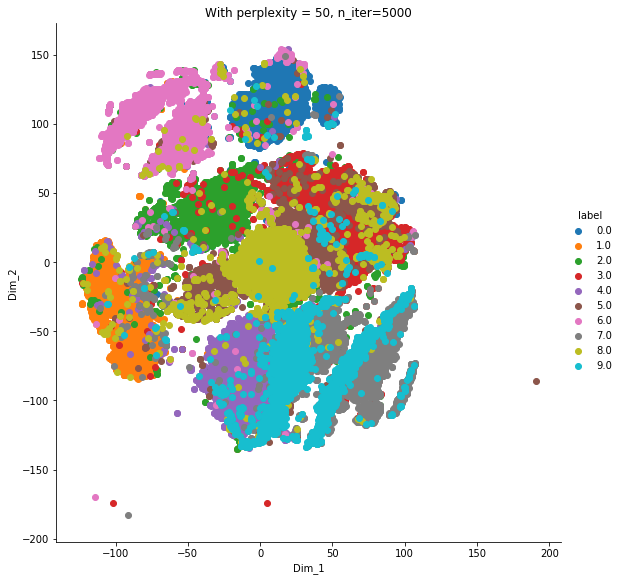

In [ ]:
# With changed step=50(no. of iterations)

model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

## Conclusions

- Keep the Step(no. of iterations) large enough where the shape of the dataset stablizes.
- Always run t-SNE for multiple perplexity values and try to find the most stable shape.
- **Never** keep the perplexity equal to the number of datapoints, otherwise it results in a mess as t-SNE does a terrible job at it.
- Since t-SNE is not a deterministic alogrithm but a **stochastic/probabilistic algorithm**, the results could be slightly different for the same perplexity and step values everytime it is applied.
- T-SNE expands a dense cluster and shrinks a sparse cluster and hence density size of clusters cannot be found out.
- The distances between clusters might not convey anything.
- T-SNE doesn't preserve the distances between clusters.
- Never try to make sense from random data.

    
# Try yourself

1.  Running tSNE with different parameters for tSNE for YOUR dataset
Let us try different parameters for perplexity on the dataset. 

2. Choose of the algorithms for embeddings e.g. Umap, diffusion maps, GNN based embeddings and try on MNIST or CIFAR.

# Node2Vec and UMAP
Paper http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
https://github.com/deveshSingh06/t-SNE/blob/master/t-SNE%20Implementation.ipynb 

Node2vec https://github.com/aditya-grover/node2vec
